In [1]:
import numpy as np
import time
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.aqua import Operator, run_algorithm

import random
from math import log, pi

from born.particle import PSO
from born.qbm import QuantumBornMachine

Initialize Quantum Born Machine
Generating targets
Setting initial condiitons
Performing PSO
Iteration 2: 0.728730
FINAL: 0.728730
Run quantum circuit
Output histogram


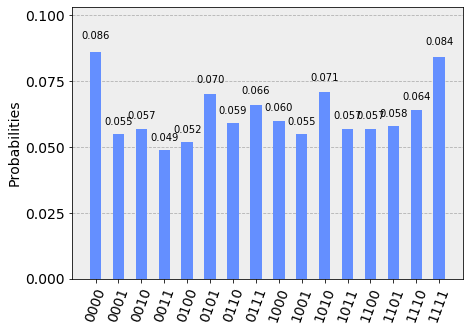

In [2]:
# Run QC training and optimization

def run_optimization(target = None, n = 4, layers = 2, shots = 1000, length = 2, num_samples = 1000, num_particles = 10):
    """
    params:
        n: number of qubits or data inputs
        layers: number of quantum circuit layers
        shots: shots per run of given circuit; larger will give better statistics from runs
        length: length of bars and stripes
        num_samples: number of target samples to generate
        num_particles: feature parameters in particle swarm
    """
    
    print("-- Initialize Quantum Born Machine --")
    qbm = QuantumBornMachine(num_qubits=n, num_shots=shots)

    # If no data supplied, generate target data
    if target is None:
        print ("-- Generating targets --")
        target = qbm.get_target(length=length, num_samples=num_samples)

    print("-- Setting initial condiitons --")
    initial = np.random.normal(loc = pi, scale = pi/2, size=int((2*n+n*(n-1))*layers))

    print("-- Performing PSO --")
    best = PSO(n, shots, target, qbm.cost_function, initial, num_particles=num_particles, maxiter=2).best()

    print("-- Run quantum circuit --")
    learned = qbm.run_circuit(best)
    
    return learned

learned = run_optimization()
print("-- Output histogram --")
plot_histogram(learned)